In [1]:
# Import the required library:

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the Dataset:

filepath = 'C:/Users/Peter Mondal/Desktop/Machine Learning/Machine Learning Project/sydney_rain_prediction.csv'
df = pd.read_csv(filepath, header = 0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


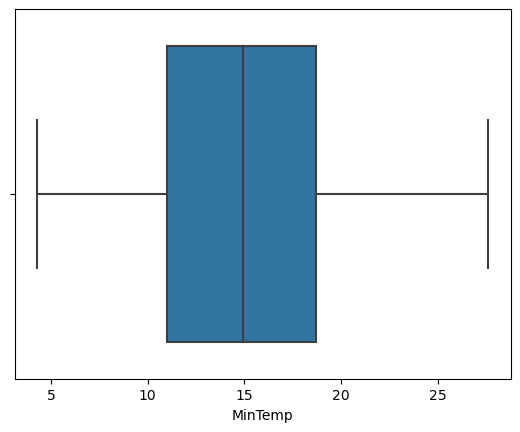

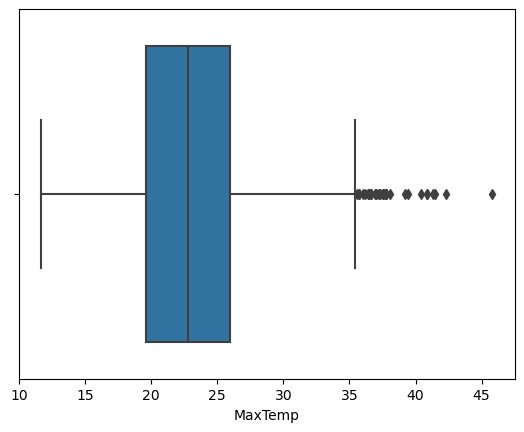

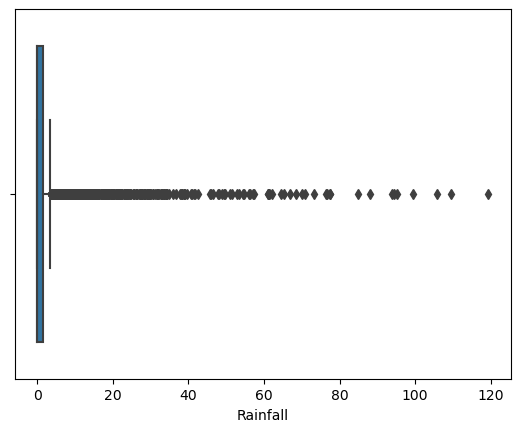

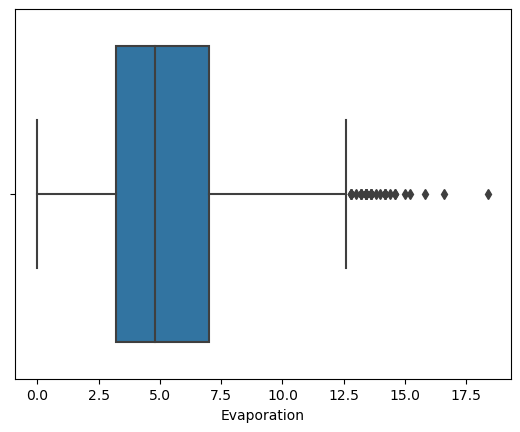

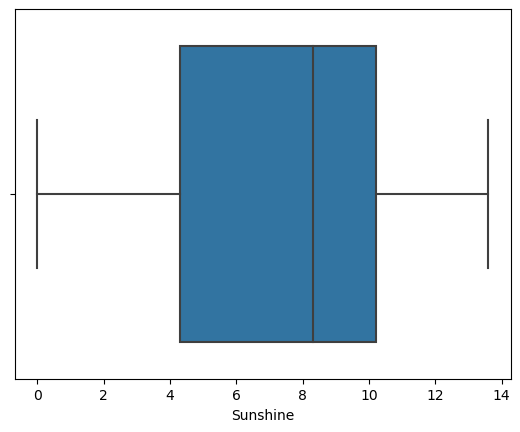

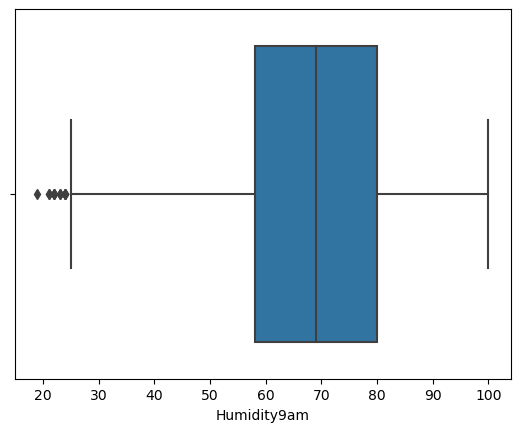

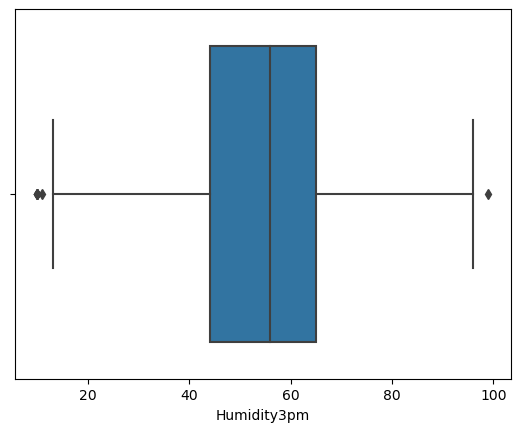

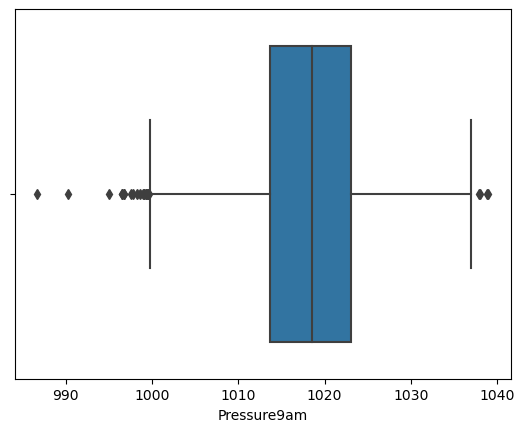

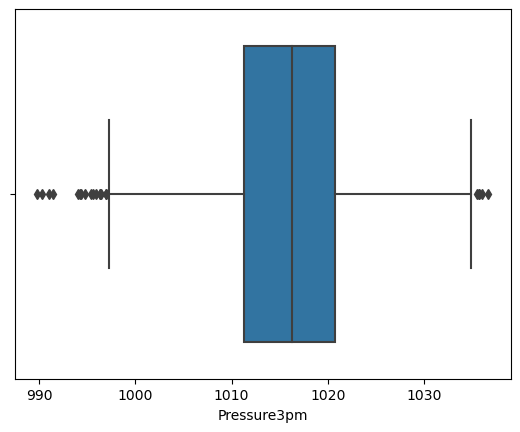

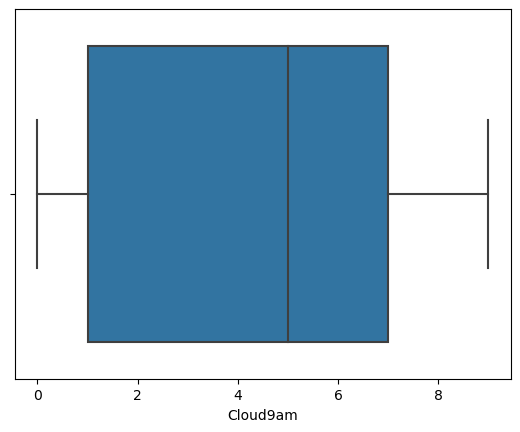

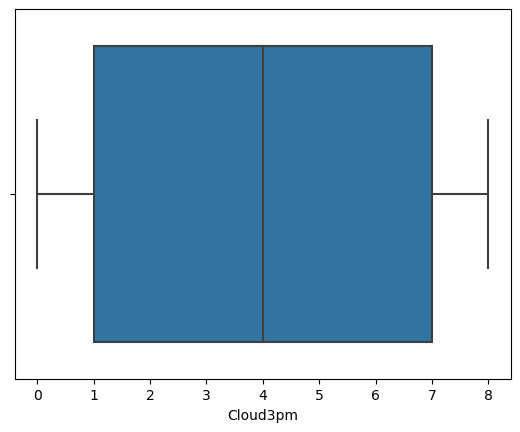

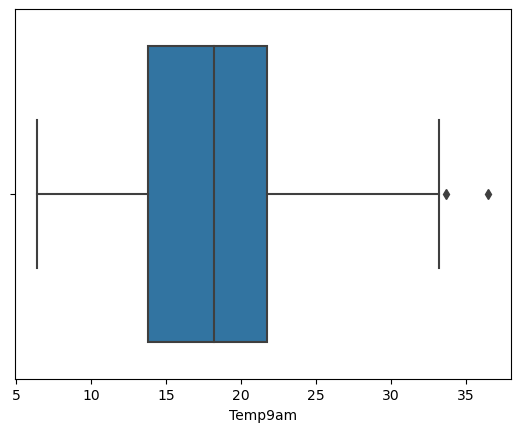

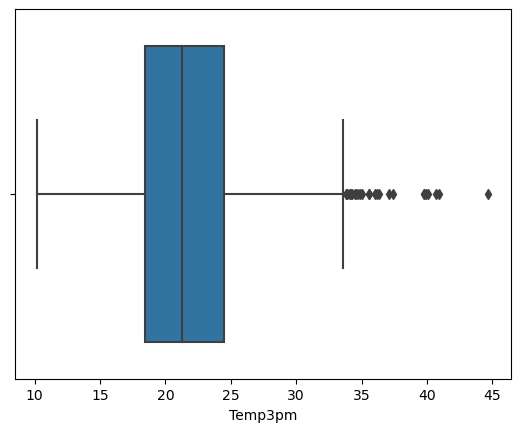

In [3]:
# Check for outliers:
import matplotlib.pyplot as plt # Import the matplotlib library
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

C:\Users\Peter Mondal\AppData\Local\Temp\ipykernel_8080\3817660620.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Peter Mondal\AppData\Local\Temp\ipykernel_8080\3817660620.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


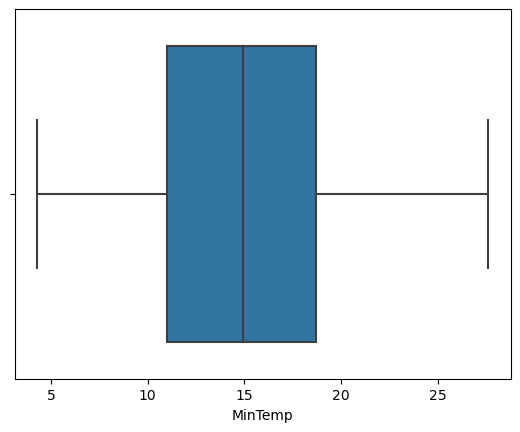

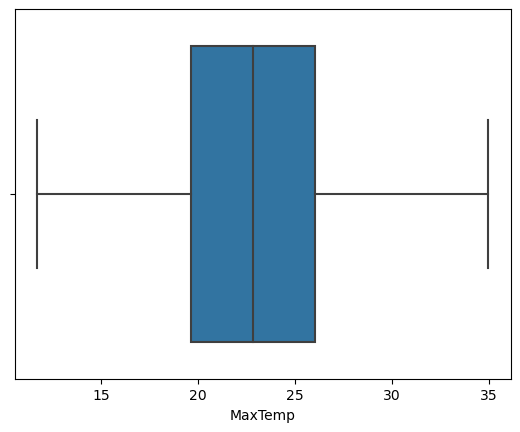

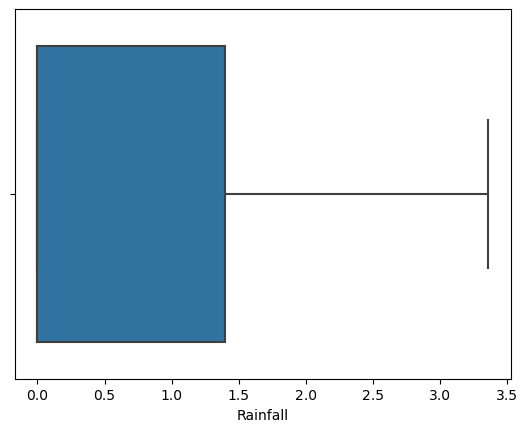

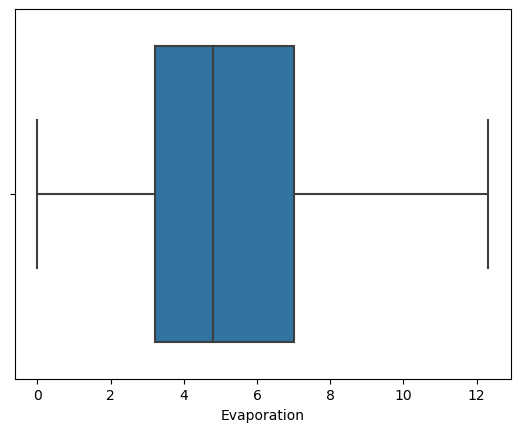

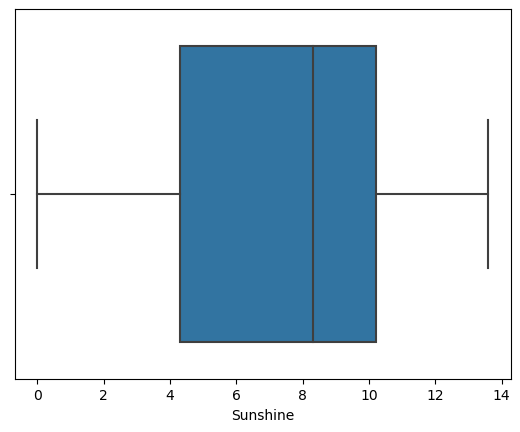

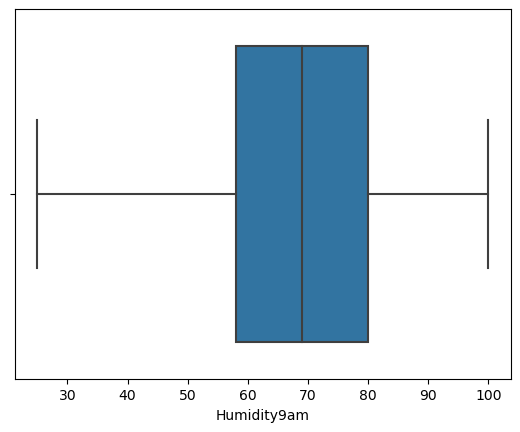

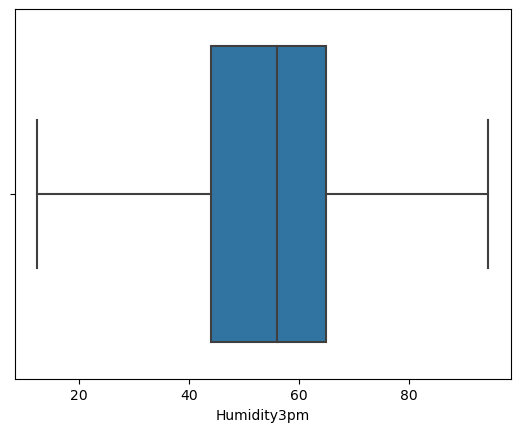

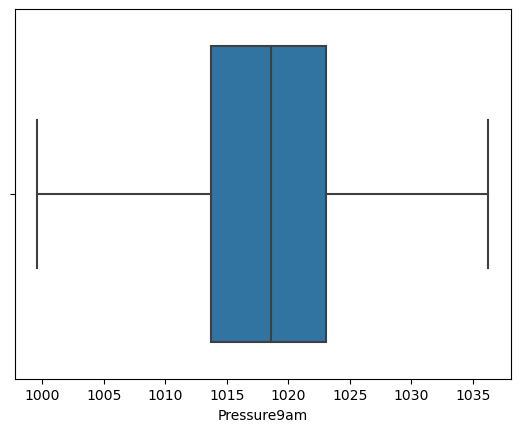

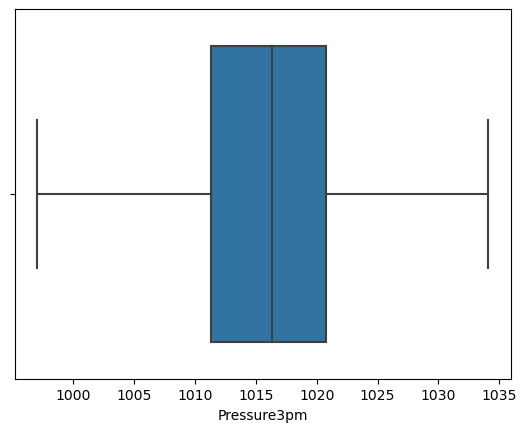

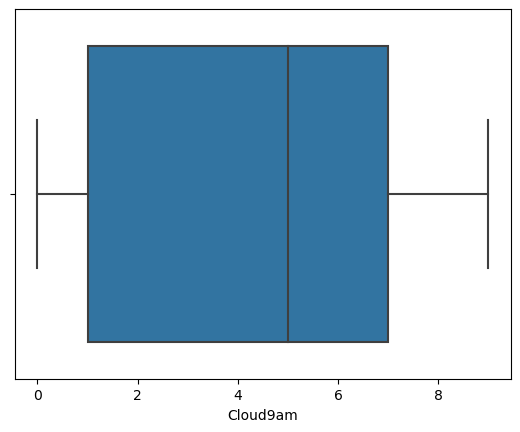

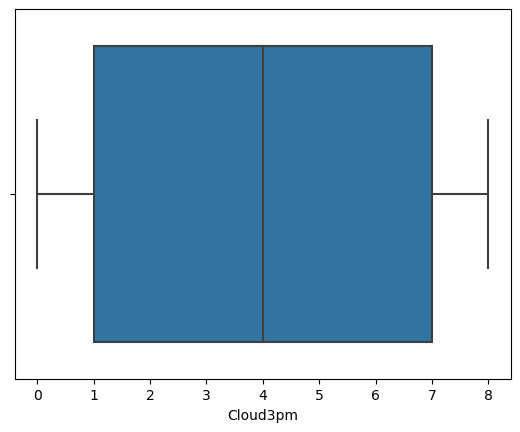

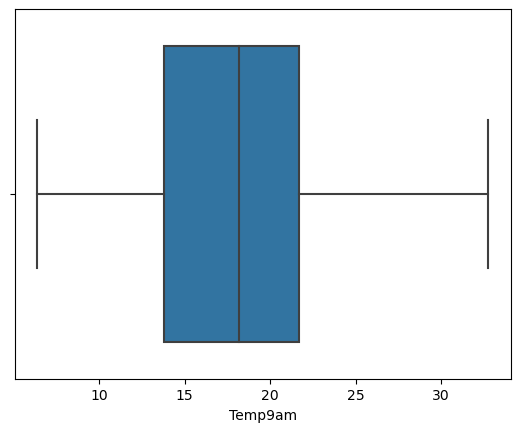

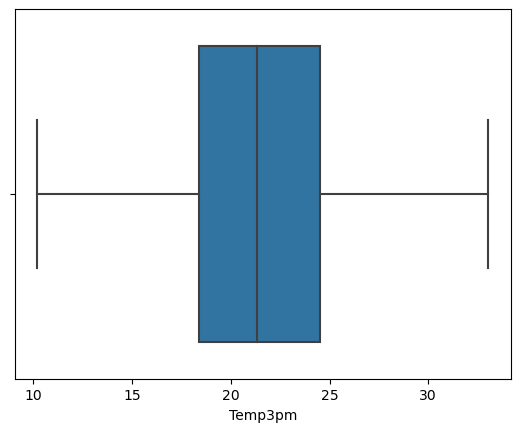

In [4]:
#Remove the Outliers in the Dataset by IQR Method:

# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.4 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
import matplotlib.pyplot as plt # Import the matplotlib library
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [5]:
#Using dataframe data: check missing values:
df.isna().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [6]:
# Delete the Location and Date Columns from the dataset:
df = df.drop('Location', axis=1)
df = df.drop('Date', axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,3.36,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,3.36,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,3.36,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,3.36,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,3.36,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [7]:
# Convert categorical columns into dummy variables, dropping the first to avoid the dummy variable trap
df= pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)

# Display the first few rows of the transformed dataframe
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.36,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.36,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.36,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.36,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.36,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [8]:
# Fill missing values in each column with the mean of that column
for column in df.columns:
    if df[column].isnull().any():
        # Use mean to fill for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)



# Display the first few rows to verify the changes
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.36,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.36,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.36,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.36,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.36,5.169586,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [9]:
#Using dataframe data: check missing values:
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [10]:
#use describe function

# Get descriptive statistics for numerical columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,22.970267,0.838523,5.169586,7.179374,68.238339,54.700120,1018.357184,1016.028177,4.181523,4.218660,17.818206,21.504962,0.259515,0.259215
std,4.551593,4.389988,1.340744,2.702518,3.801737,15.025889,16.242379,6.946416,6.962727,2.505491,2.409531,4.889091,4.205162,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,12.500000,999.600000,997.050000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,34.960000,3.360000,12.320000,13.600000,100.000000,94.400000,1036.260000,1034.100000,9.000000,8.000000,32.760000,33.040000,1.000000,1.000000


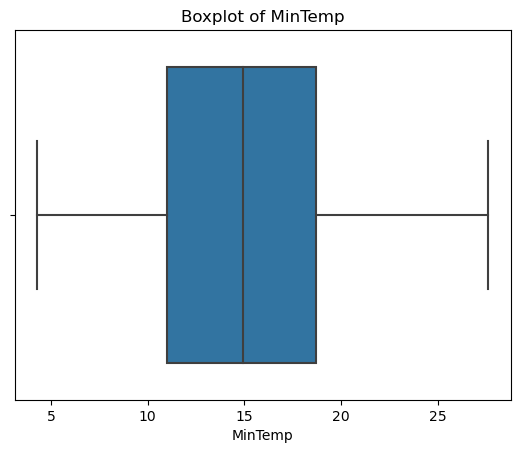

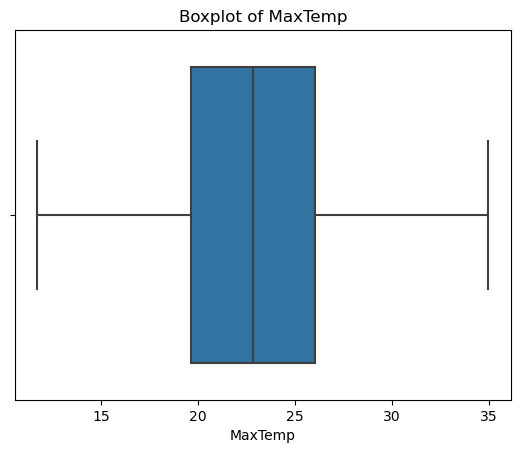

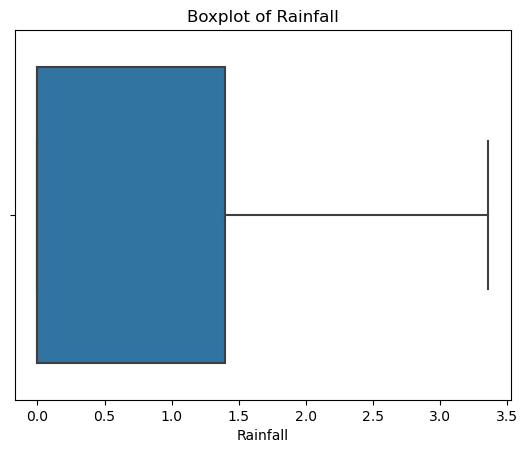

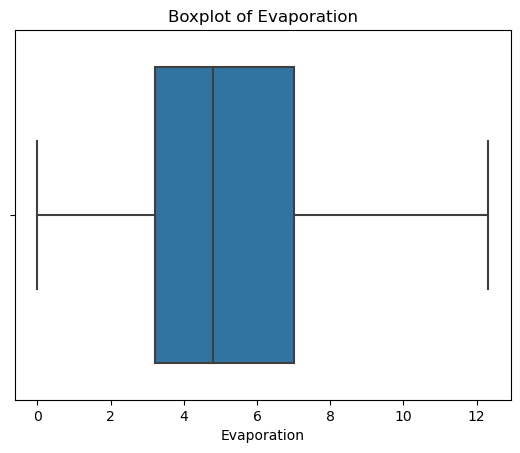

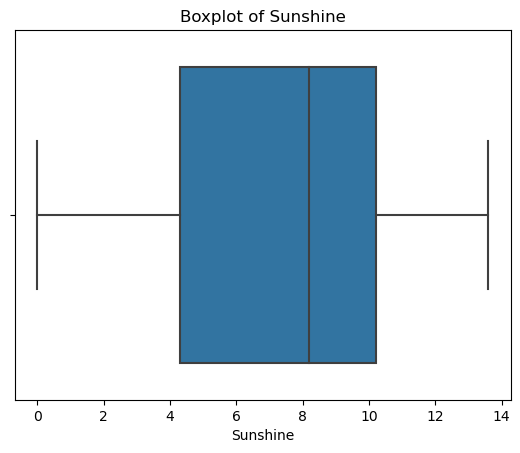

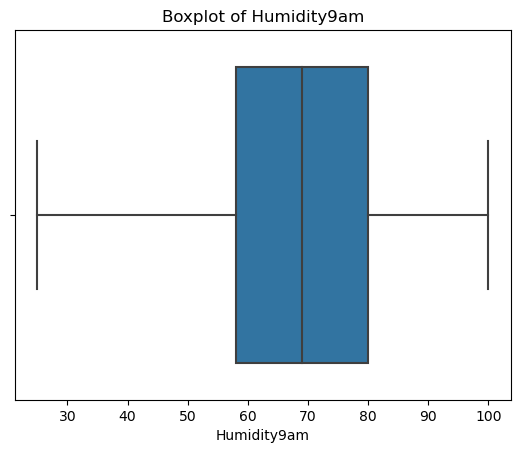

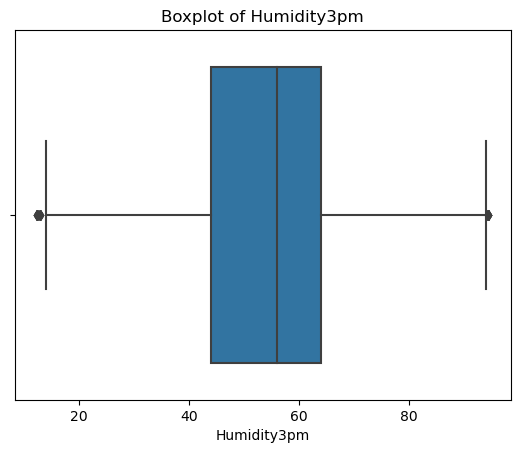

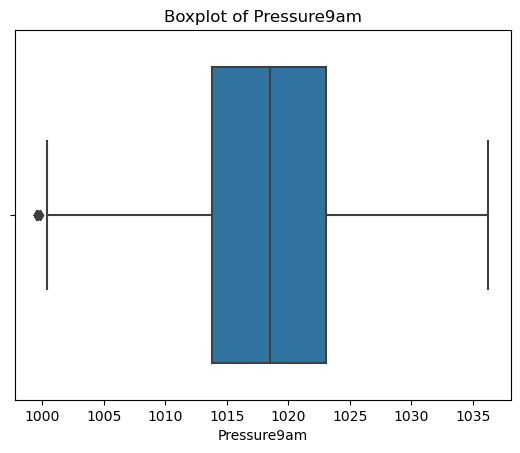

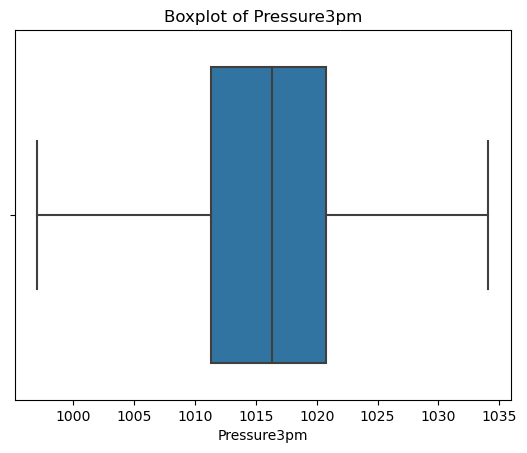

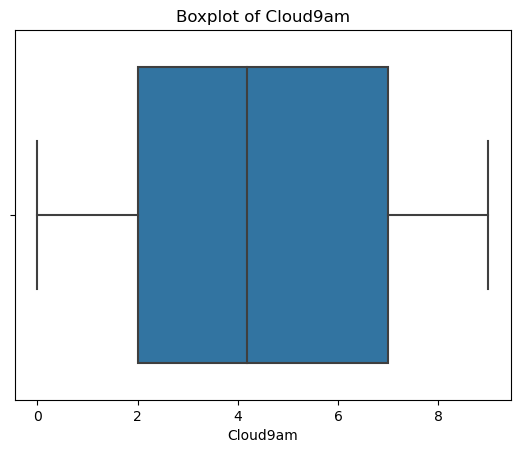

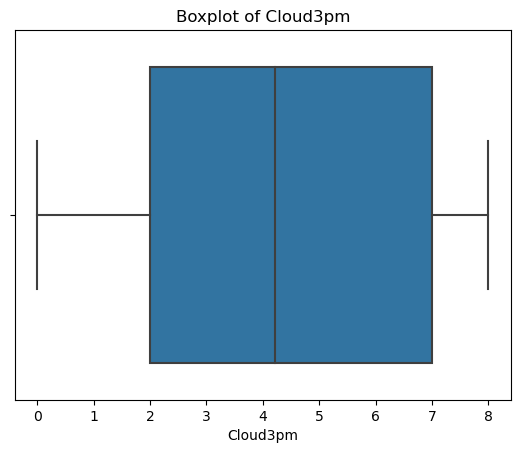

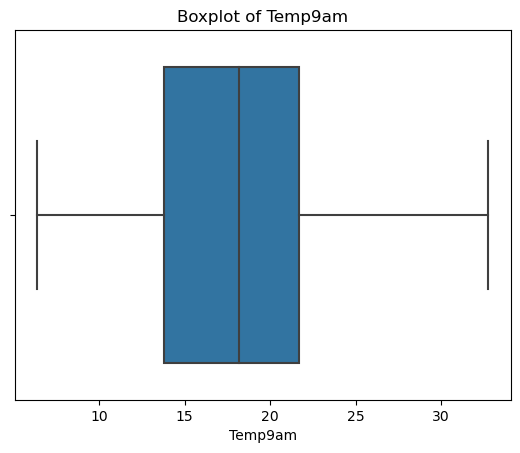

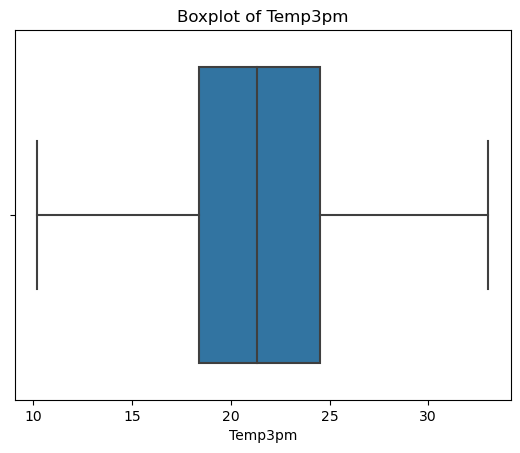

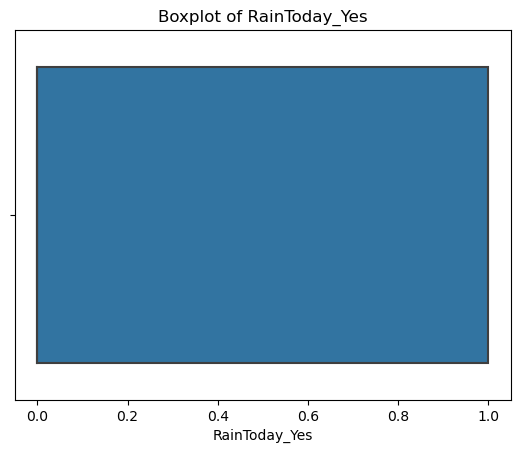

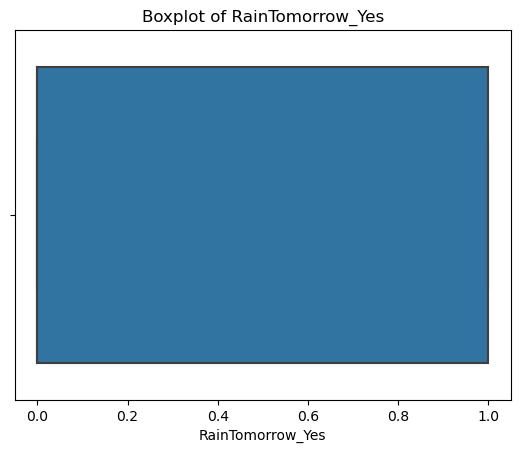

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [12]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.36,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.36,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.36,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.36,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.36,5.169586,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


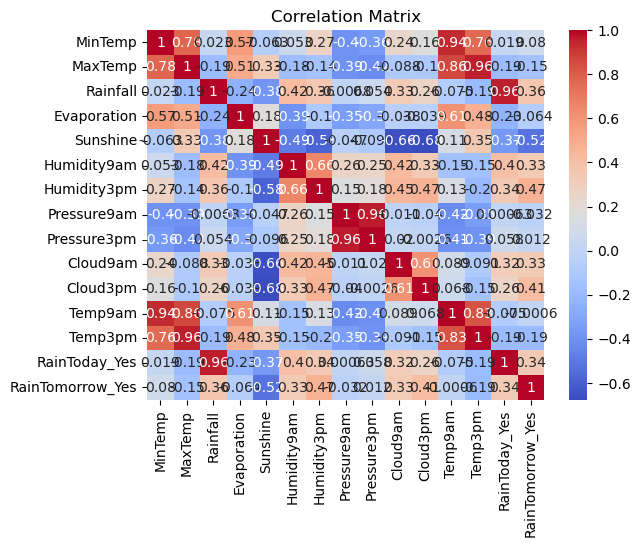

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   uint8  
 14  RainTomorrow_Yes  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


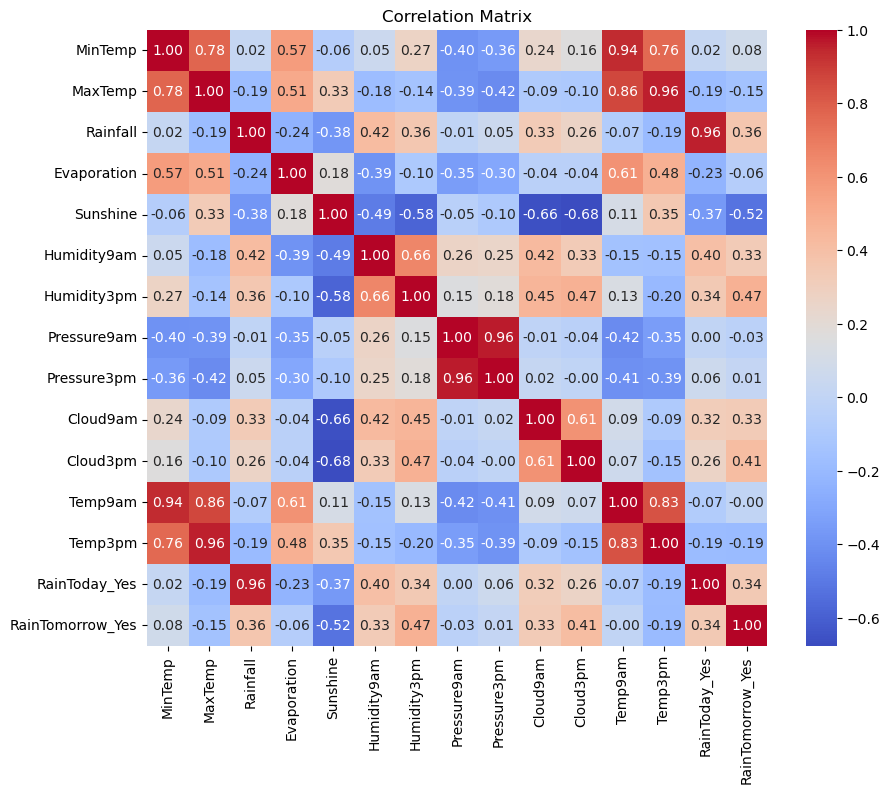

In [15]:
# Assuming capped_df is your DataFrame
correlation_matrix = df.corr()
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title("Correlation Matrix")
plt.show()

In [16]:
# To find the feature with the highest correlation with RainTomorrow columns, we'll calculate the correlation matrix
correlation_matrix = df.corr()

# Extracting the 'RainTomorrow' column to find its correlations with other features
quality_correlations = correlation_matrix['RainTomorrow_Yes'].drop('RainTomorrow_Yes')  # Exclude self-correlation

# Finding the feature with the highest correlation with RainTomorrow:
most_correlated_feature = quality_correlations.idxmax()
highest_correlation = quality_correlations.max()

most_correlated_feature, highest_correlation


('Humidity3pm', 0.47162114609965505)

In [17]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_train_pred= classifier.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score for test data:', accuracy_score(y_test, y_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred))

# Evaluate the model on the training set
y_train_pred = classifier.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred))


Accuracy score for test data: 0.8368263473053892
Confusion matrix for test data:
 [[475  35]
 [ 74  84]]
Accuracy score for training data: 0.8332708879730236
Confusion matrix for training data:
 [[1814  148]
 [ 297  410]]


C:\Users\Peter Mondal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_lda))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_lda))

# Evaluate the model on the training set
y_train_pred_lda = lda.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_lda))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_lda))


Accuracy score for test data: 0.842814371257485
Confusion matrix for test data:
 [[471  39]
 [ 66  92]]
Accuracy score for training data: 0.8332708879730236
Confusion matrix for training data:
 [[1800  162]
 [ 283  424]]


In [19]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn))

# Evaluate the KNN model on the training set
y_train_pred_knn = knn.predict(X_train_scaled)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_knn))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_knn))


Accuracy score for test data: 0.8263473053892215
Confusion matrix for test data:
 [[470  40]
 [ 76  82]]
Accuracy score for training data: 0.8651180217309854
Confusion matrix for training data:
 [[1859  103]
 [ 257  450]]


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_knn_tuned = grid_search.predict(X_test_scaled)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn_tuned))


Best parameters: {'n_neighbors': 18}
Best score: 0.8239103091117341
Accuracy score for test data: 0.8263473053892215
Confusion matrix for test data:
 [[483  27]
 [ 89  69]]


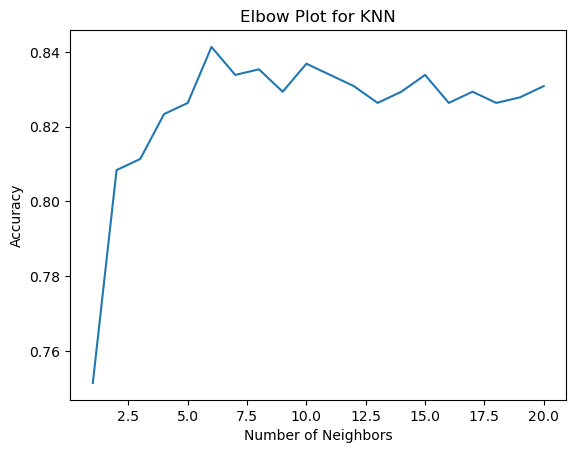

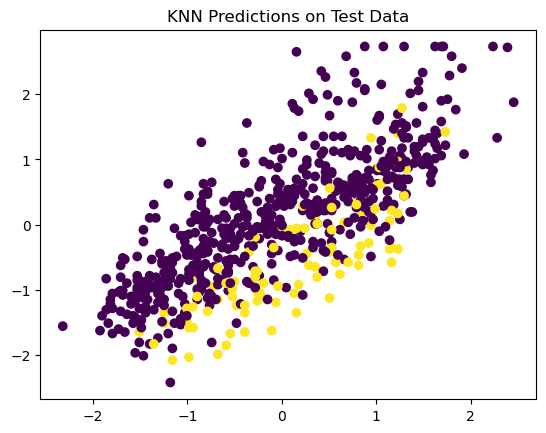

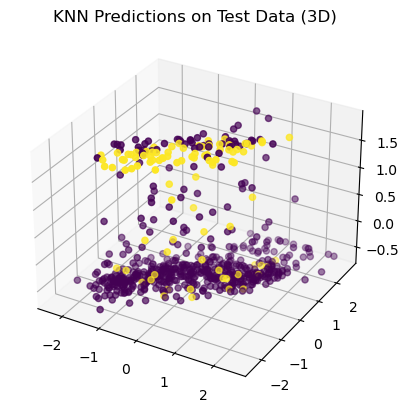

In [21]:


# Elbow plot to find the optimal number of neighbors
k_range = range(1, 21)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Elbow Plot for KNN')
plt.show()

# Scatter plot of the data points colored by their predicted labels
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data')
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data (3D)')
plt.show()


Accuracy score for test data: 0.7769461077844312
Confusion matrix for test data:
 [[429  81]
 [ 68  90]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]
Best parameters: {'max_depth': 4}
Best score: 0.829151646745508
Accuracy score for test data: 0.8338323353293413
Confusion matrix for test data:
 [[484  26]
 [ 85  73]]


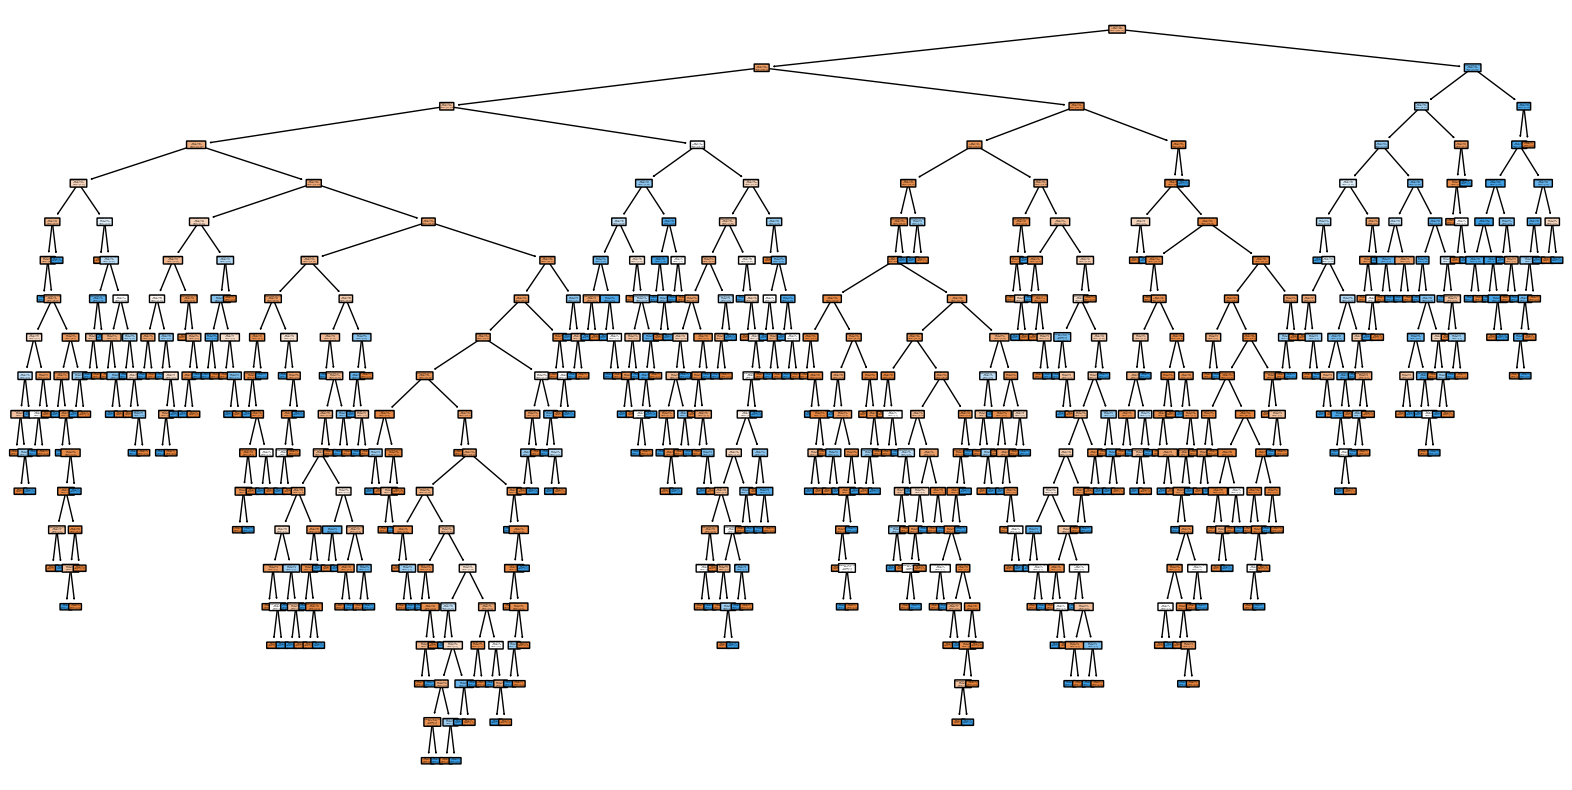

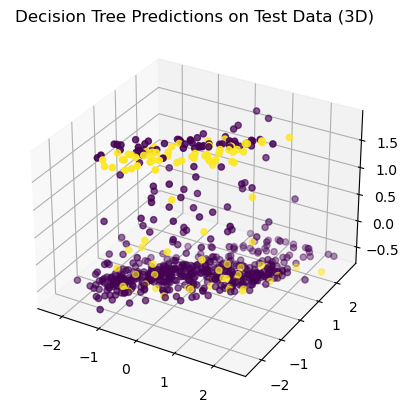

In [22]:


# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the decision tree to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the Decision Tree model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree))

# Evaluate the Decision Tree model on the training set
y_train_pred_dtree = dtree.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_dtree))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_dtree))


# Perform grid search cross-validation to find the optimal hyperparameters
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_dtree_tuned = grid_search.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_tuned))


# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_dtree_tuned)
plt.title('Decision Tree Predictions on Test Data (3D)')
plt.show()

Accuracy score for test data: 0.811377245508982
Confusion matrix for test data:
 [[457  53]
 [ 73  85]]


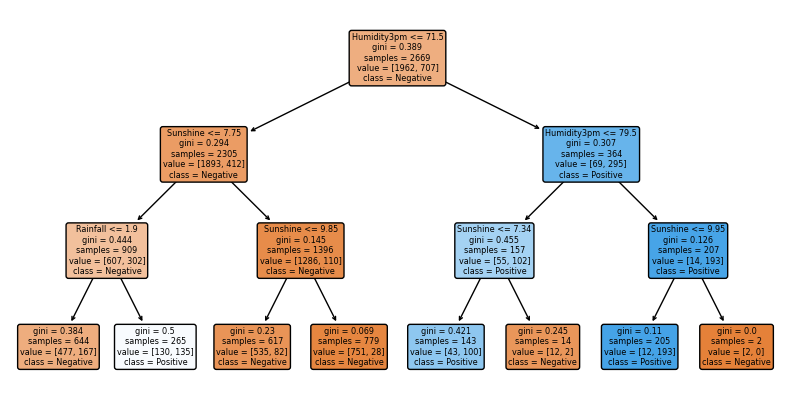

In [23]:


# Prune the decision tree to a maximum depth of 3
dtree_pruned = DecisionTreeClassifier(max_depth=3)

# Fit the pruned tree to the training data
dtree_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree_pruned = dtree_pruned.predict(X_test)

# Evaluate the pruned tree on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_pruned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(10,5))
plot_tree(dtree_pruned, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()


In [24]:


# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Fit the random forest to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf))

# Evaluate the Random Forest model on the training set
y_train_pred_rf = rf.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf))



Accuracy score for test data: 0.8263473053892215
Confusion matrix for test data:
 [[475  35]
 [ 81  77]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]


In [25]:


# Use GridSearchCV to find the optimal hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the Random Forest model with the best parameters
rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf_tuned))

# Evaluate the model on the training set
y_train_pred_rf_tuned = rf_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf_tuned))


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 0.829150944059138
Accuracy score for test data: 0.8473053892215568
Confusion matrix for test data:
 [[485  25]
 [ 77  81]]
Accuracy score for training data: 0.9040839265642563
Confusion matrix for training data:
 [[1921   41]
 [ 215  492]]


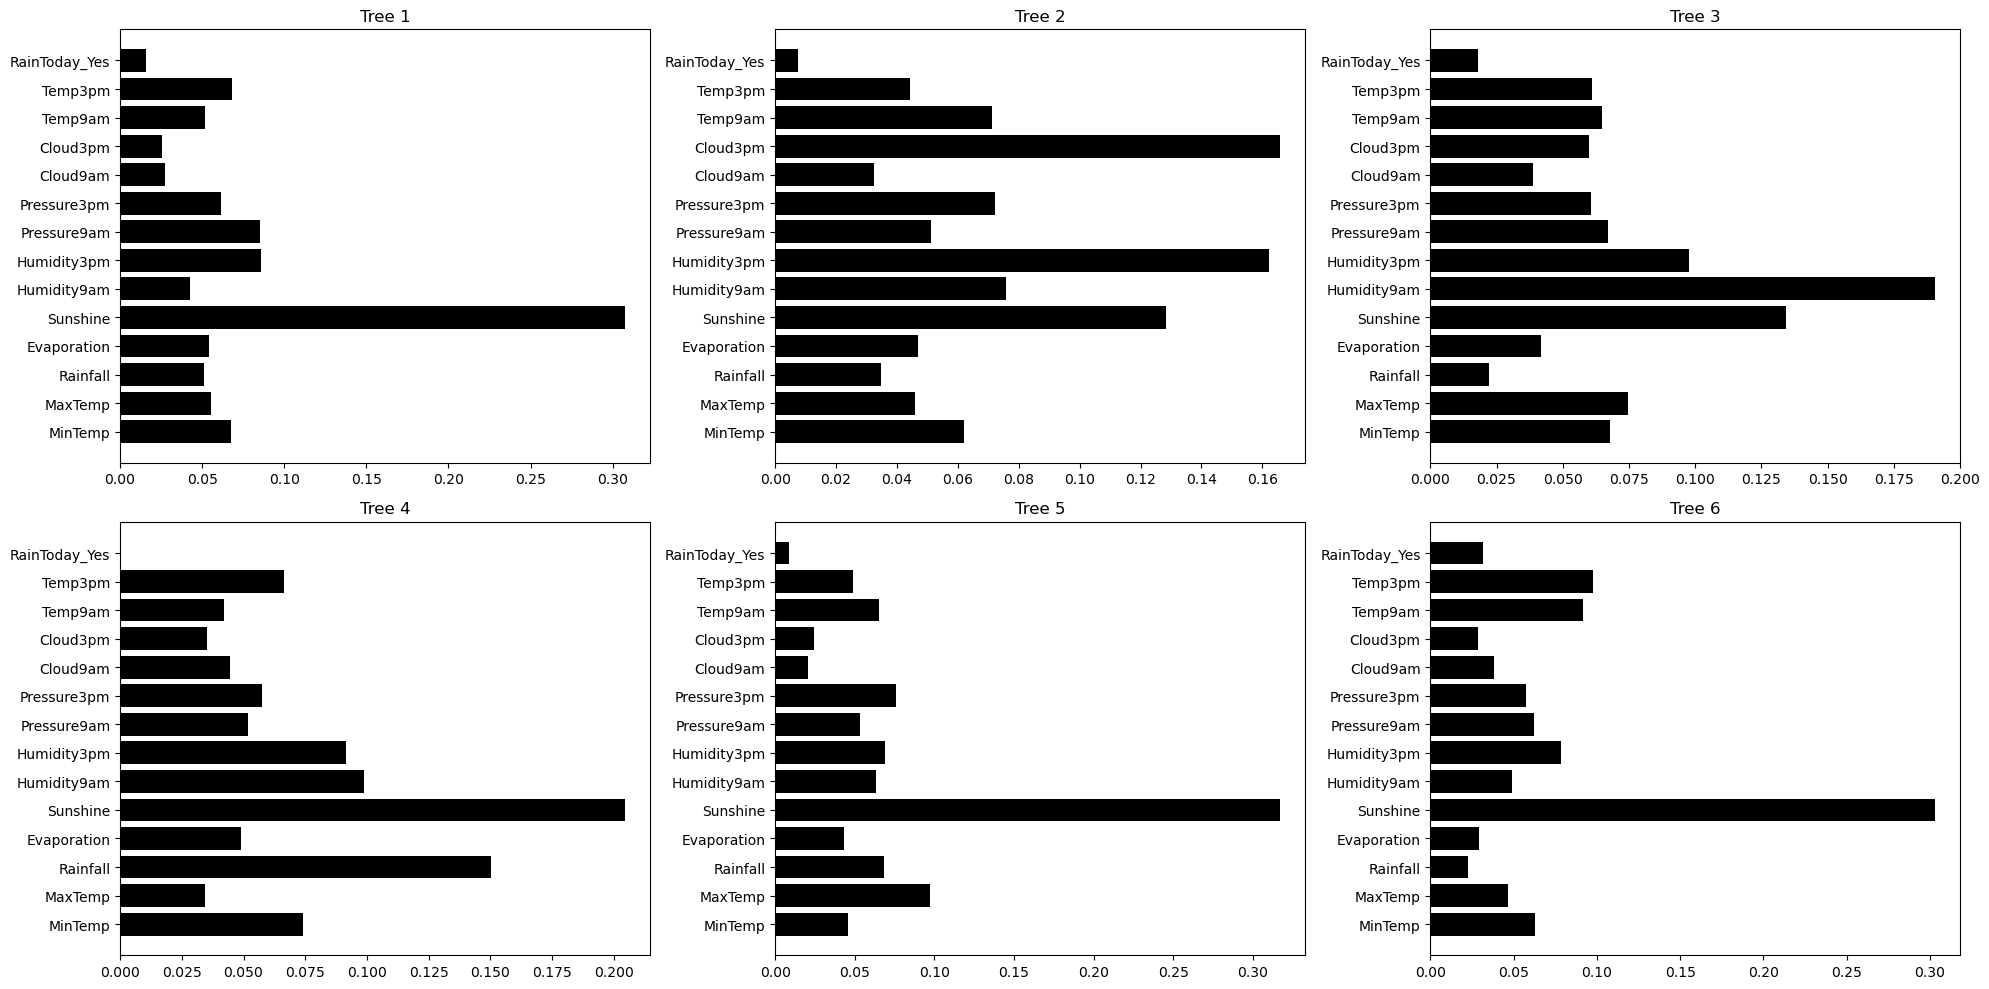

In [26]:
# prompt: generate a visual of random forest

import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot the feature importances for each tree in the forest
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
  ax.barh(X.columns, tree.feature_importances_, color='black', align='center')
  ax.set_title(f'Tree {i + 1}')

# Tight layout and show the plot
plt.tight_layout()
plt.show()


In [27]:


from xgboost import XGBClassifier

# Create an XGBoost classifier object
xgb = XGBClassifier()

# Fit the XGBoost model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb))

# Evaluate the XGBoost model on the training set
y_train_pred_xgb = xgb.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb))

# Use GridSearchCV to find the optimal hyperparameters for the XGBoost model
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the XGBoost model with the best parameters
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb_tuned))

# Evaluate the model on the training set
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb_tuned))


Accuracy score for test data: 0.8293413173652695
Confusion matrix for test data:
 [[472  38]
 [ 76  82]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.7}
Best score: 0.8171638172734363
Accuracy score for test data: 0.8502994011976048
Confusion matrix for test data:
 [[482  28]
 [ 72  86]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]


In [28]:


# Use early stopping to prevent overfitting
xgb = XGBClassifier(n_estimators=500, max_depth=20, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb))

# Evaluate the XGBoost model on the training set
y_train_pred_xgb = xgb.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb))


Accuracy score for test data: 0.8502994011976048
Confusion matrix for test data:
 [[482  28]
 [ 72  86]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]


1. Your views about the problem statement?
Several times the challenging weather condition makes life miserable and also affects the businesses directly or indirectly. Nowadays, everybody wants to start their day with a good plan so that most of the people often used to check the weather report before preparing their daily plan. Although the weather forecasts are not always perfect but using Machine Learning based data mining method it is possible to forecast future weather conditions based on the historical data.

The project represents the machine learning-based predictive analysis to predict the rainfall for upcoming day based on the given data. The proposed system will help to predict the future trend of the weather considering the historical data. Through this model, the probability of the rainfall can be analyzed so that all the people can make their plans without any confusion.

2. What will be your approach to solving this task?


Step 1: The numerical columns containing the null values are as follows - MinTemp, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm.

Step 2: In order to fill the null values of the numerical columns, the mean of corresponding values has been calculated and the empty fields will be filled using the mean values.

In the Original Weather dataset, the RainToday have binary values (Yes and No) so this variable should be converted into 0 (No) and 1 (Yes).

In the Original Weather dataset, the records having the empty values for the RainToday attribute is always equals to RainTommorrow value from above's row (a day before).

In order to extract the features from the dataset initially the numerical and character attributes have been identified. The character variables cannot be used as the input to the machine learning classifiers so these variables need to be converted into numerical variables.

Step 3: Thirdly, after completing the EDA part we have to visualize the data using the Elbowplot for KNN, Decision Tree diagram with the dependent and independent variable.

Step 4: Fourthly, we have to preparing the data, divide the data into the dependent and independent variable. Then split the data into training data and test data.

Step 5: After splitting the data perform the Classification model with default parameters and train Classification model with training data. And further on testing the data then visualize the predicted data and actual data.

Step 6: In this step we have to calculate the accuracy of the model.

3. What were the available ML model options you had to perform this task?
The main types of classification techniques available for this problem statement are:

1.KNN  2.Logistic Regression 3.Decision Tree 4.Random Forest Regression 5.Linear Discriminant Analysis (LDA) 6.Xgb Boost 

4. Which model’s performance is best and what could be the possible reason for that?
The model which performed the best is  XGBoost model  which has a accuracy score of  0.8458083832335329, which is the higest among all the models. (y_pred_xgb_tuned)

5. What steps can you take to improve this selected model’s performance even further?
The selected model performance shows some amount of Overfitting, which can be improved:

By iteratively training the model on multiple subsets of the data and evaluating its performance, k-fold cross-validation aids in identifying the appropriate hyperparameters that balance model complexity with generalization ability, reducing overfitting.
We can solve the problem of overfitting by: Increasing the training data by data augmentation.
Perform proper Feature selection by choosing the best features and remove the useless/unnecessary features.